In [5]:
import zipfile
import os
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import cv2 as cv
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
import matplotlib.pyplot as plt

Dataset creato da immagini di 3 attori diversi e organizzato in sottocartelle per ogni classe


In [ ]:
zip = zipfile.ZipFile('/Actors.zip')
zip.extractall()
zip.close()

## Data augmentation


Operations performed: rotation, flip, brightness

In [ ]:
def data_aug():
#for each folder in actors directory perform data augmentation
    #data generator
    datagen = ImageDataGenerator(rotation_range=30, fill_mode='nearest', horizontal_flip=True, brightness_range=[0.5,1.5])
    iterator = datagen.flow_from_directory("./Actors", color_mode="rgb", batch_size=1, class_mode="categorical")

    for f in sorted(os.listdir('./Actors/Bradley')):
        if f.endswith('.jpg'):
            img = cv.imread('/content/Actors/Bradley/' + f)
            img = img_to_array(img)
            img = expand_dims(img, 0)
            iterator = datagen.flow(img, batch_size=1)
            # generate samples
            for i in range(9):
                # generate batch of images
                batch = iterator.next()
                # convert to unsigned integers
                image = batch[0].astype('uint8')
                f = f.replace(".jpg", "")
                cv.imwrite('/content/Actors/Bradley/' + f + "_" + str(i) + ".jpg", image)

    for f in sorted(os.listdir('./Actors/Leonardo')):
        if f.endswith('.jpg'):
            img = cv.imread('/content/Actors/Leonardo/' + f)
            img = img_to_array(img)
            img = expand_dims(img, 0)
            iterator = datagen.flow(img, batch_size=1)
            # generate samples
            for i in range(9):
                # generate batch of images
                batch = iterator.next()
                # convert to unsigned integers
                image = batch[0].astype('uint8')
                f = f.replace(".jpg", "")
                cv.imwrite('/contentActors/Leonardo/' + f + "_" + str(i) + ".jpg", image)

    for f in sorted(os.listdir('./Actors/Toretto')):
        if f.endswith('.jpg'):
            img = cv.imread('/content/Actors/Toretto/' + f)
            img = img_to_array(img)
            img = expand_dims(img, 0)
            iterator = datagen.flow(img, batch_size=1)
            # generate samples
            for i in range(9):
                # generate batch of images
                batch = iterator.next()
                # convert to unsigned integers
                image = batch[0].astype('uint8')
                f = f.replace(".jpg", "")
                cv.imwrite('/contentActors/Toretto/' + f + "_" + str(i) + ".jpg", image)


In [ ]:
data_aug()

Found 65 images belonging to 3 classes.


Example of data augmentation

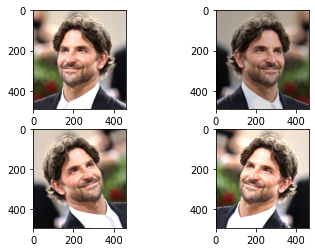

In [38]:
import matplotlib.image as mpimg 
from matplotlib.pyplot import imshow
plt.subplot(2,2,1)
plt.imshow(mpimg.imread(("/content/Actors/Bradley/19_1.jpg")))
plt.subplot(2,2,2)
plt.imshow(mpimg.imread(("/content/Actors/Bradley/19_2.jpg")))
plt.subplot(2,2,3)
plt.imshow(mpimg.imread(("/content/Actors/Bradley/19_3.jpg")))
plt.subplot(2,2,4)
plt.imshow(mpimg.imread(("/content/Actors/Bradley/19_4.jpg")))

Data loader

In [ ]:
def load_data():
    labels = []
    images = []

    for f in sorted(os.listdir('./Actors/Bradley')):
        if f.endswith('.jpg'):
            img = cv.imread('.Actors/Bradley/' + f)
            images.append(img)
            # lable
            labels.append("Bradley")

    for f in sorted(os.listdir('./Actors/Leonardo')):
        if f.endswith('.jpg'):
            img = cv.imread('./Actors/Leonardo' + f)
            images.append(img)
            # lable
            labels.append("Leonardo")

    for f in sorted(os.listdir('./Actors/Toretto')):
        if f.endswith('.jpg'):
            img = cv.imread('./Actors/Toretto' + f)
            images.append(img)
            # lable
            labels.append("Toretto")

    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=1)
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = load_data()